#  Using Webscraping to Extract  Data Example from 'https://www.worldometers.info/coronavirus/'


In [1]:
# import libraries
import requests
import pandas as pd
from bs4 import BeautifulSoup
import os

In [2]:
# create url object
url = 'https://www.worldometers.info/coronavirus/#page-top'
# determine my_head User-Agent
my_head = {'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/119.0.0.0 Safari/537.36 Edg/119.0.0.0'}
# request to get the page
html = requests.get(url,my_head)
# check connection
html.status_code # 200 is right connection

200

In [3]:
# using beautiful soup library to parsing the html page
soup = BeautifulSoup(html.text, 'lxml') # use text because we want to work with a string format


'<!DOCTYPE html>\n<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->\n<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->\n<!--[if !IE]><!-->\n<html lang="en">\n <!--<![endif]-->\n <head>\n  <meta charset="utf-8"/>\n  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>\n  <meta content="width=device-width, initial-scale=1" name="viewport"/>\n  <title>\n   COVID - Coronavirus Statistics - Worldometer\n  </title>\n  <meta content="Daily and weekly updated statistics tracking the number of COVID-19 cases, recovered, and deaths. Historical data with cumulative charts, graphs, and updates." name="description"/>\n  <!-- Favicon -->\n  <link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/>\n  <link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>\n  <link href="/favicon/apple-icon-60x60.png" rel="apple-touch-icon" sizes="60x60"/>\n  <link href="/favicon/apple-icon-72x72.png" rel="apple-touch-icon" sizes="72x72"/>\n  <link href="/fa
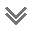

In [4]:
soup.prettify()

In [5]:
# find the table what we want to use
tables = soup.find_all('table')
len(tables) # to know what we have?

3

In [6]:
# we can determine the table using id parameter
table = soup.find('table' , id='main_table_countries_today')
table.thead # i used table head to invoke the head of table that I want to use , then use the variable "table"

<thead>
<tr>
<th width="1%">#</th>
<th width="100">Country,<br/>Other</th>
<th width="20">Total<br/>Cases</th>
<th width="30">New<br/>Cases</th>
<th width="30">Total<br/>Deaths</th>
<th width="30">New<br/>Deaths</th>
<th width="30">Total<br/>Recovered</th>
<th width="30">New<br/>Recovered</th>
<th width="30">Active<br/>Cases</th>
<th width="30">Serious,<br/>Critical</th>
<th width="30">Tot Cases/<br/>1M pop</th>
<th width="30">Deaths/<br/>1M pop</th>
<th width="30">Total<br/>Tests</th>
<th width="30">Tests/<br/>
<nobr>1M pop</nobr>
</th>
<th width="30">Population</th>
<th style="display:none" width="30">Continent</th>
<th width="30">1 Case<br/>every X ppl</th><th width="30">1 Death<br/>every X ppl</th><th width="30">1 Test<br/>every X ppl</th>
<th width="30">New Cases/1M pop</th>
<th width="30">New Deaths/1M pop</th>
<th width="30">Active Cases/1M pop</th>
</tr>
</thead>

In [7]:
# now we gonna write code to get headers of table
headers = [i.text for i in table.thead.find_all('th')] # list to append data into it.
len(headers) # to know how many columns in the table, and to invoke it use variable headers to know.


22

In [8]:
# to scrap the values data
table_values = []
for row in table.tbody.find_all('tr'): # find table row
    tag_td = row.find_all('td')        # find table data 
    values = [i.text for i in tag_td] # use nested loop to determine value for every row
    table_values.append(values)       # put the date into the table_values list by append function
table_values  # to invoke the list

[['',
  '\nNorth America\n',
  '129,049,975',
  '',
  '1,653,030',
  '',
  '124,790,702',
  '+1,334',
  '2,606,243',
  '6,446',
  '',
  '',
  '',
  '',
  '',
  'North America',
  '\n',
  '',
  '',
  '',
  '',
  ''],
 ['',
  '\nAsia\n',
  '220,815,223',
  '+160',
  '1,551,658',
  '+11',
  '204,532,203',
  '+139',
  '14,731,362',
  '15,143',
  '',
  '',
  '',
  '',
  '',
  'Asia',
  '\n',
  '',
  '',
  '',
  '',
  ''],
 ['',
  '\nEurope\n',
  '250,847,202',
  '+41,170',
  '2,078,574',
  '+112',
  '246,688,330',
  '+38,035',
  '2,080,298',
  '5,615',
  '',
  '',
  '',
  '',
  '',
  'Europe',
  '\n',
  '',
  '',
  '',
  '',
  ''],
 ['',
  '\nSouth America\n',
  '69,181,719',
  '',
  '1,362,310',
  '',
  '66,560,799',
  '',
  '1,258,610',
  '10,095',
  '',
  '',
  '',
  '',
  '',
  'South America',
  '\n',
  '',
  '',
  '',
  '',
  ''],
 ['',
  '\nOceania\n',
  '14,698,885',
  '',
  '30,699',
  '',
  '14,561,855',
  '+2',
  '106,331',
  '49',
  '',
  '',
  '',
  '',
  '',
  'Australia/Ocean

In [9]:
my_data = pd.DataFrame(table_values, columns=headers) # use pandas data frame
my_data.head()   # to show the fifth first row  data from the table

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",...,TotalTests,Tests/\n1M pop\n,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
0,,\nNorth America\n,"129,049,975",,"1,653,030",,"124,790,702","+1,334","2,606,243","6,446",...,,,,North America,\n,,,,,
1,,\nAsia\n,"220,815,223",+160,"1,551,658",+11,"204,532,203",+139,"14,731,362","15,143",...,,,,Asia,\n,,,,,
2,,\nEurope\n,"250,847,202","+41,170","2,078,574",+112,"246,688,330","+38,035","2,080,298","5,615",...,,,,Europe,\n,,,,,
3,,\nSouth America\n,"69,181,719",,"1,362,310",,"66,560,799",,"1,258,610","10,095",...,,,,South America,\n,,,,,
4,,\nOceania\n,"14,698,885",,"30,699",,"14,561,855",+2,"106,331",49,...,,,,Australia/Oceania,\n,,,,,


In [10]:
# Drop and clearing unnecessary rows
my_data.drop(my_data.index[0:8], inplace=True)
#my_data.drop(my_data.index[222:229], inplace=True)
my_data.reset_index(inplace=True, drop=True)
# Drop “#” column
my_data.drop('#', inplace=True, axis=1)

In [11]:
my_data

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,...,TotalTests,Tests/\n1M pop\n,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
0,USA,"109,233,586",,"1,181,548",,"107,158,346",,"893,692","1,282","326,260",...,"1,186,431,670","3,543,647","334,805,269",North America,3,283,0,,,"2,669"
1,India,"45,001,268",,"533,293",,N/A,N/A,N/A,N/A,"31,992",...,"930,797,975","661,721","1,406,631,776",Asia,31,"2,638",2,,,0.2
2,France,"40,138,560",,"167,642",,"39,970,918",,0,869,"612,013",...,"271,490,188","4,139,547","65,584,518",Europe,2,391,0,,,
3,Germany,"38,553,102",,"176,793",,"38,240,600",,"135,709",N/A,"459,602",...,"122,332,384","1,458,359","83,883,596",Europe,2,474,1,,,"1,618"
4,Brazil,"37,949,944",,"706,808",,"36,249,161",,"993,975",N/A,"176,222",...,"63,776,166","296,146","215,353,593",South America,6,305,3,,,"4,616"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,Tokelau,80,,,,,,80,,"58,055",...,,,"1,378",Australia/Oceania,17,,,,,"58,055"
227,Vatican City,29,,,,29,,0,,"36,295",...,,,799,Europe,28,,,,,
228,Western Sahara,10,,1,,9,,0,,16,...,,,"626,161",Africa,"62,616","626,161",,,,
229,MS Zaandam,9,,2,,7,,0,,,...,,,,,,,,,,


In [12]:
# # Export to csv
my_data.to_csv('covid_data.csv', index=False)
# Try to read csv
my_data2 = pd.read_csv('covid_data.csv')

In [13]:
my_data2  # show the data 

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,...,TotalTests,Tests/\n1M pop\n,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
0,USA,"109,233,586",NaN,"1,181,548",NaN,"107,158,346",NaN,"893,692","1,282","326,260",...,"1,186,431,670","3,543,647","334,805,269",North America,3,283,0.0,NaN,NaN,"2,669"
1,India,"45,001,268",NaN,"533,293",NaN,NaN,NaN,NaN,NaN,"31,992",...,"930,797,975","661,721","1,406,631,776",Asia,31,"2,638",2.0,NaN,NaN,0.2
2,France,"40,138,560",NaN,"167,642",NaN,"39,970,918",NaN,0,869,"612,013",...,"271,490,188","4,139,547","65,584,518",Europe,2,391,0.0,NaN,NaN,NaN
3,Germany,"38,553,102",NaN,"176,793",NaN,"38,240,600",NaN,"135,709",NaN,"459,602",...,"122,332,384","1,458,359","83,883,596",Europe,2,474,1.0,NaN,NaN,"1,618"
4,Brazil,"37,949,944",NaN,"706,808",NaN,"36,249,161",NaN,"993,975",NaN,"176,222",...,"63,776,166","296,146","215,353,593",South America,6,305,3.0,NaN,NaN,"4,616"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,Tokelau,80,NaN,,NaN,NaN,NaN,80,NaN,"58,055",...,NaN,NaN,"1,378",Australia/Oceania,17,NaN,NaN,NaN,NaN,"58,055"
227,Vatican City,29,NaN,,NaN,29,NaN,0,NaN,"36,295",...,NaN,NaN,799,Europe,28,NaN,NaN,NaN,NaN,NaN
228,Western Sahara,10,NaN,1,NaN,9,NaN,0,NaN,16,...,NaN,NaN,"626,161",Africa,"62,616","626,161",NaN,NaN,NaN,NaN
229,MS Zaandam,9,NaN,2,NaN,7,NaN,0,NaN,NaN,...,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN
